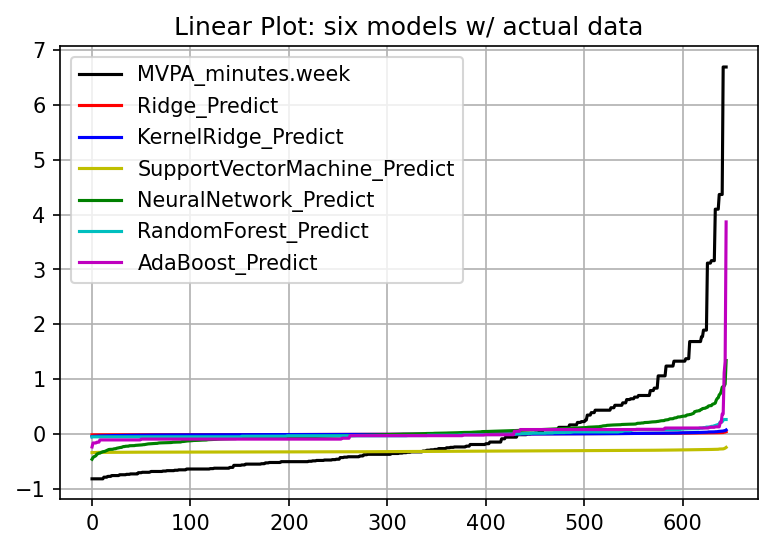

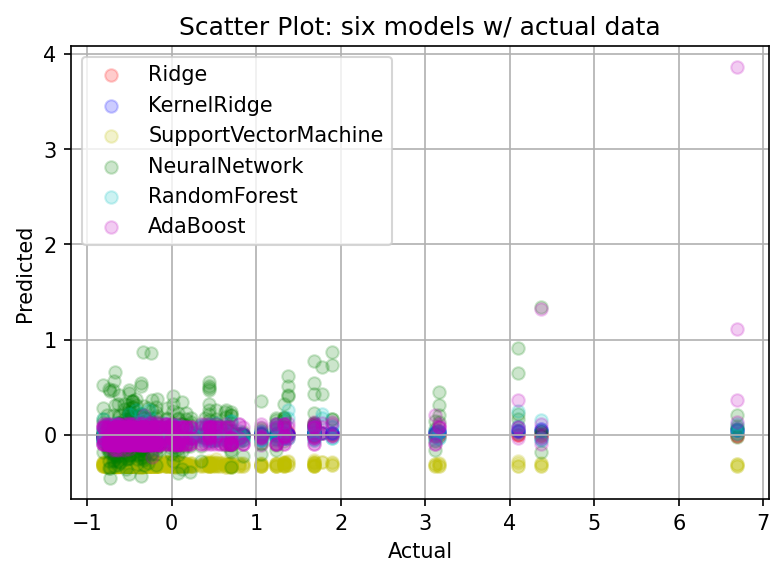

In [1]:
# Draw the graph w/ six models and actual data

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import Ridge  # Ridge regression
from sklearn.kernel_ridge import KernelRidge  # Kernel ridge regression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor  # AdaBoost & Random Forest
from sklearn.neural_network import MLPRegressor  # Neural network
from sklearn.svm import SVR  # Support vector machine

# Cross-validation
from sklearn.model_selection import GridSearchCV, cross_val_score

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir + '/y_MVPA/y_MVPA.xlsx')#to import the preprocessed dataset into a variable

A = pd.DataFrame(dataset.iloc[:,4:9])
b = dataset['MVPA']

# fit the model
ridge = Ridge(alpha=10000.0).fit(A, b)
kr = KernelRidge(alpha=100.0, gamma=10.0, kernel='rbf').fit(A, b)
svr = SVR(C=1000.0, coef0=0.0, gamma=7.847599703514623e-08, kernel='rbf').fit(A, b)
nn = MLPRegressor(alpha=0.1, max_iter=10000).fit(A, b)
rf = RandomForestRegressor(max_depth=1, max_features=0.1, n_estimators=20).fit(A, b)
ab = AdaBoostRegressor(learning_rate=0.30000000000000004, n_estimators=10).fit(A, b)

# yhat
bhat_ridge = ridge.predict(A)
bhat_kr = kr.predict(A)
bhat_svr = svr.predict(A)
bhat_nn = nn.predict(A)
bhat_rf = rf.predict(A)
bhat_ab = ab.predict(A)

plt.figure(dpi=150)
plt.title("Linear Plot: six models w/ actual data")

plt.plot(range(len(b)), sorted(b), c="k", label="MVPA_minutes.week")
plt.plot(range(len(bhat_ridge)), sorted(bhat_ridge), c="r", label="Ridge_Predict")
plt.plot(range(len(bhat_kr)), sorted(bhat_kr), c="b", label="KernelRidge_Predict")
plt.plot(range(len(bhat_svr)), sorted(bhat_svr), c="y", label="SupportVectorMachine_Predict")
plt.plot(range(len(bhat_nn)), sorted(bhat_nn), c="g", label="NeuralNetwork_Predict")
plt.plot(range(len(bhat_rf)), sorted(bhat_rf), c="c", label="RandomForest_Predict")
plt.plot(range(len(bhat_ab)), sorted(bhat_ab), c="m", label="AdaBoost_Predict")

plt.grid(True)
plt.legend()
plt.savefig(fname=path_up1Dir + "/y_MVPA/linear_6Models_actualData.png")
plt.show()

plt.figure(dpi=150)
plt.title("Scatter Plot: six models w/ actual data")
plt.scatter(x=b, y=bhat_ridge, alpha=0.2, c="r", label="Ridge")
plt.scatter(x=b, y=bhat_kr, alpha=0.2, c="b", label="KernelRidge")
plt.scatter(x=b, y=bhat_svr, alpha=0.2, c="y", label="SupportVectorMachine")
plt.scatter(x=b, y=bhat_nn, alpha=0.2, c="g", label="NeuralNetwork")
plt.scatter(x=b, y=bhat_rf, alpha=0.2, c="c", label="RandomForest")
plt.scatter(x=b, y=bhat_ab, alpha=0.2, c="m", label="AdaBoost")

plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.savefig(fname=path_up1Dir + "/y_MVPA/scatter_6Models_actualData.png")
plt.show()

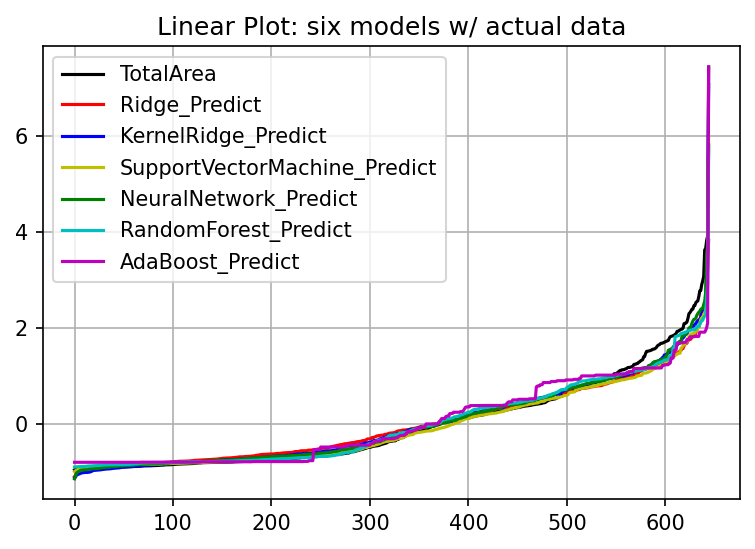

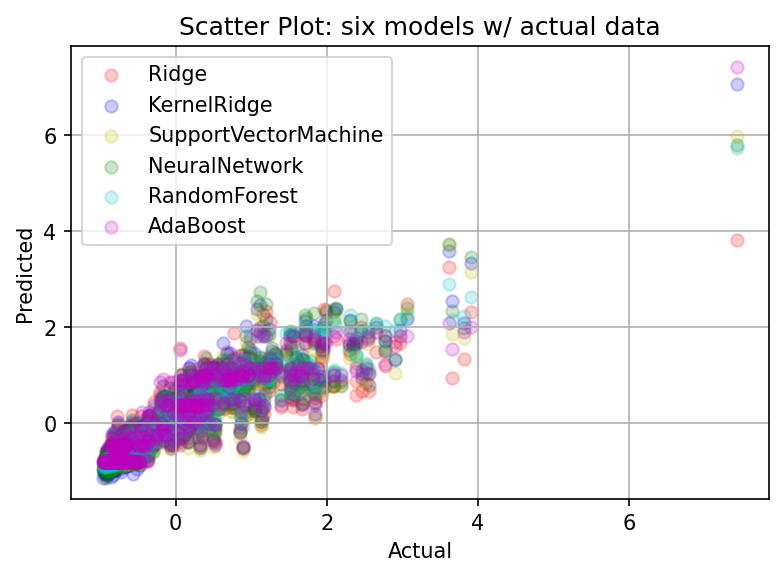

In [2]:
X = pd.DataFrame(dataset.iloc[:,5:10])
y = dataset['aveTotalArea']

# fit the model
ridge = Ridge(alpha=100.0).fit(X, y)
kr = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf').fit(X, y)
svr = SVR(C=10.0, coef0=0.0, gamma=0.04832930238571752, kernel='rbf').fit(X, y)
nn = MLPRegressor(alpha=1e-05, max_iter=10000).fit(X, y)
rf = RandomForestRegressor(max_depth=6, max_features=0.5, n_estimators=80).fit(X, y)
ab = AdaBoostRegressor(learning_rate=0.7000000000000001, n_estimators=30).fit(X, y)

# yhat
yhat_ridge = ridge.predict(X)
yhat_kr = kr.predict(X)
yhat_svr = svr.predict(X)
yhat_nn = nn.predict(X)
yhat_rf = rf.predict(X)
yhat_ab = ab.predict(X)

##################
# Linear plot
plt.figure(dpi=150)
plt.title("Linear Plot: six models w/ actual data")

plt.plot(range(len(y)), sorted(y), c="k", label="TotalArea")
plt.plot(range(len(yhat_ridge)), sorted(yhat_ridge), c="r", label="Ridge_Predict")
plt.plot(range(len(yhat_kr)), sorted(yhat_kr), c="b", label="KernelRidge_Predict")
plt.plot(range(len(yhat_svr)), sorted(yhat_svr), c="y", label="SupportVectorMachine_Predict")
plt.plot(range(len(yhat_nn)), sorted(yhat_nn), c="g", label="NeuralNetwork_Predict")
plt.plot(range(len(yhat_rf)), sorted(yhat_rf), c="c", label="RandomForest_Predict")
plt.plot(range(len(yhat_ab)), sorted(yhat_ab), c="m", label="AdaBoost_Predict")

plt.grid(True)
plt.legend()
plt.savefig(fname=path_up1Dir + "/y_totalArea/linear_6Models_actualData.png")
plt.show()

##################
# Scatter plot
plt.figure(dpi=150)
plt.title("Scatter Plot: six models w/ actual data")
plt.scatter(x=y, y=yhat_ridge, alpha=0.2, c="r", label="Ridge")
plt.scatter(x=y, y=yhat_kr, alpha=0.2, c="b", label="KernelRidge")
plt.scatter(x=y, y=yhat_svr, alpha=0.2, c="y", label="SupportVectorMachine")
plt.scatter(x=y, y=yhat_nn, alpha=0.2, c="g", label="NeuralNetwork")
plt.scatter(x=y, y=yhat_rf, alpha=0.2, c="c", label="RandomForest")
plt.scatter(x=y, y=yhat_ab, alpha=0.2, c="m", label="AdaBoost")

plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.savefig(fname=path_up1Dir + "/y_totalArea/scatter_6Models_actualData.png")
plt.show()

In [5]:
'''
est = Ridge(alpha=100.0)
est = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')
est = SVR(C=10.0, coef0=0.0, gamma=0.04832930238571752, kernel='rbf')
est = MLPRegressor(alpha=1e-05, max_iter=10000)
est = RandomForestRegressor(max_depth=6, max_features=0.5, n_estimators=80)
est = AdaBoostRegressor(learning_rate=0.1, n_estimators=30)
'''


###############
# 10-Fold r2 score y_MVPA
class learning(object): 

    def __init__(self, alg, rule): # alg = algorithm name, rule = evaluation rule
        self.alg = alg
        self.rule = rule
    
    def algorithm(self):
        alg = self.alg
        
        if alg == 'ridge':
            est = Ridge(alpha=10000.0)
        elif alg == 'kr':
            est = KernelRidge(alpha=100.0, gamma=10.0, kernel='rbf')
        elif alg == 'svr':
            est = SVR(C=1000.0, coef0=0.0, gamma=7.847599703514623e-08, kernel='rbf')
        elif alg == 'nn':
            est = MLPRegressor(alpha=1e-05, max_iter=10000)
        elif alg == 'rf':
            est = RandomForestRegressor(max_depth=6, max_features=0.5, n_estimators=80)
        elif alg == 'ab':
            est = AdaBoostRegressor(learning_rate=0.30000000000000004, n_estimators=10)
        else:
            print("unvalid algorithm.")
            return 0
            
        return est
        
    
    def scoring(self):
        score = cross_val_score(estimator=self.algorithm(),
                                X=A, y=b,
                                cv=10,
                                scoring=self.rule
                               )
        print("\nBest score in %s by 10-Fold:\n" %self.rule, score)
        print("\nAverage score in %s by 10-Fold:\n" %self.rule, score.mean())
        
        
if __name__ == '__main__':
    algs = ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab'] # ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab']
    rules = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2'] # ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2']

    for alg in algs:
        if alg == 'ridge':
            model = 'Ridge'
        elif alg == 'kr':
            model = 'KernelRidge'
        elif alg == 'svr':
            model = 'SVR'
        elif alg == 'nn':
            model = 'MLPRegressor'
        elif alg == 'rf':
            model = 'RandomForestRegressor'
        elif alg == 'ab':
            model = 'AdaBoostRegressor'
        else:
            print("unvalid algorithm.")
            
        print("\n------------- %s -------------" %model)
        
        for rule in rules:
            test = learning(alg, rule)
            test.scoring()


------------- Ridge -------------

Best score in neg_mean_absolute_error by 10-Fold:
 [-0.93329148 -0.56919733 -0.41140646 -0.53359313 -0.88374987 -0.48856144
 -0.51862579 -0.72308199 -0.54356059 -0.79915992]

Average score in neg_mean_absolute_error by 10-Fold:
 -0.6404228003502963

Best score in neg_mean_squared_error by 10-Fold:
 [-1.89623915 -0.38055485 -0.22357439 -0.37886677 -1.73165871 -0.28863924
 -0.45407766 -0.93714666 -0.93322497 -3.08860015]

Average score in neg_mean_squared_error by 10-Fold:
 -1.0312582536575534

Best score in neg_median_absolute_error by 10-Fold:
 [-0.651667   -0.61419805 -0.36606574 -0.5722238  -0.51833166 -0.49202408
 -0.489498   -0.52907671 -0.33069293 -0.40984679]

Average score in neg_median_absolute_error by 10-Fold:
 -0.4973624743909003

Best score in r2 by 10-Fold:
 [-0.05161325 -0.99189891 -0.29332174 -0.20932979 -0.34003183 -0.13132841
 -0.00202676 -0.01601719 -0.01328606 -0.02903109]

Average score in r2 by 10-Fold:
 -0.20778850404737356

---

In [6]:
###############
# 10-Fold r2 score y_totalArea
class learning(object): 

    def __init__(self, alg, rule): # alg = algorithm name, rule = evaluation rule
        self.alg = alg
        self.rule = rule
    
    def algorithm(self):
        alg = self.alg
        
        if alg == 'ridge':
            est = Ridge(alpha=100.0)
        elif alg == 'kr':
            est = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')
        elif alg == 'svr':
            est = SVR(C=10.0, coef0=0.0, gamma=0.04832930238571752, kernel='rbf')
        elif alg == 'nn':
            est = MLPRegressor(alpha=1e-05, max_iter=10000)
        elif alg == 'rf':
            est = RandomForestRegressor(max_depth=6, max_features=0.5, n_estimators=80)
        elif alg == 'ab':
            est = AdaBoostRegressor(learning_rate=0.7000000000000001, n_estimators=30)
        else:
            print("unvalid algorithm.")
            return 0
        return est
        
    
    def scoring(self):
        score = cross_val_score(estimator=self.algorithm(),
                                X=X, y=y,
                                cv=10,
                                scoring=self.rule
                               )
        print("\nBest score in %s by 10-Fold:\n" %self.rule, score)
        print("\nAverage score in %s by 10-Fold:\n" %self.rule, score.mean())
        
        
if __name__ == '__main__':
    models = ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab']
    rules = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2'] # ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2']

    for alg in algs:
        for rule in rules:
            test = learning(alg, rule)
            test.scoring()
            
            #         if alg == 'ridge':
#             model = 'Ridge'
#         elif alg == 'kr':
#             model = 'KernelRidge'
#         elif alg == 'svr':
#             model = 'SVR'
#         elif alg == 'nn':
#             model = 'MLPRegressor'
#         elif alg == 'rf':
#             model = 'RandomForestRegressor'
#         elif alg == 'ab':
#             model = 'AdaBoostRegressor'
#         else:
#             print("unvalid algorithm.")
            
#         print("\n------------- %s -------------" %model)


------------- Ridge -------------

Best score in neg_mean_absolute_error by 10-Fold:
 [-0.42682084 -0.25413416 -0.25071182 -0.28946792 -0.43526317 -0.270783
 -0.43132392 -0.25277916 -0.30189492 -0.30174109]

Average score in neg_mean_absolute_error by 10-Fold:
 -0.32149199896599373

Best score in neg_mean_squared_error by 10-Fold:
 [-0.5894697  -0.12581962 -0.15110597 -0.1777032  -0.40968144 -0.15109109
 -0.35997805 -0.11807221 -0.18352207 -0.23812624]

Average score in neg_mean_squared_error by 10-Fold:
 -0.25045695844130683

Best score in neg_median_absolute_error by 10-Fold:
 [-0.22507863 -0.16321649 -0.16795533 -0.17676892 -0.2781526  -0.14392868
 -0.25412207 -0.18061    -0.20828187 -0.17607079]

Average score in neg_median_absolute_error by 10-Fold:
 -0.1974185383154315

Best score in r2 by 10-Fold:
 [0.67595714 0.61986447 0.80604689 0.77309749 0.71669709 0.88100021
 0.69754552 0.75207645 0.69606724 0.76981933]

Average score in r2 by 10-Fold:
 0.7388171830983622

------------- K

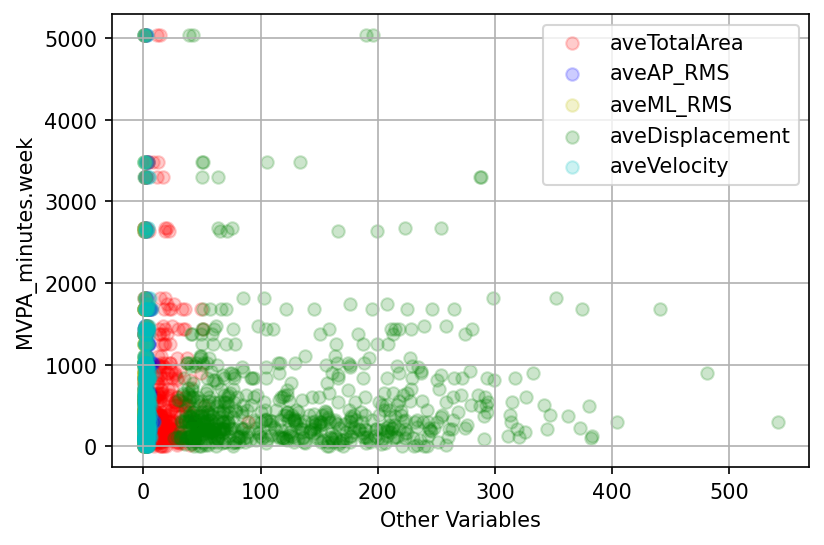

In [9]:
path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir + '/BDS/variables.xlsx')#to import the preprocessed dataset into a variable

C1 = dataset['aveTotalArea']
C2 = dataset['aveAP_RMS']
C3 = dataset['aveML_RMS']
C4 = dataset['aveDisplacement']
C5 = dataset['aveVelocity']
d = dataset['MVPA_minutes.week']

plt.figure(dpi=150)
#plt.title("Scatter Plot: six models w/ actual data")
plt.scatter(y=d, x=C1, alpha=0.2, c="r", label="aveTotalArea")
plt.scatter(y=d, x=C2, alpha=0.2, c="b", label="aveAP_RMS")
plt.scatter(y=d, x=C3, alpha=0.2, c="y", label="aveML_RMS")
plt.scatter(y=d, x=C4, alpha=0.2, c="g", label="aveDisplacement")
plt.scatter(y=d, x=C5, alpha=0.2, c="c", label="aveVelocity")

plt.ylabel('MVPA_minutes.week') 
plt.xlabel('Other Variables')
plt.grid(True)
plt.legend()
#plt.savefig(fname=path_up1Dir + "/y_totalArea/scatter_6Models_actualData.png")
plt.show()

In [ ]:
# Set param_grid, aka the main parameters in dict
    def param_grid(self):
        alg = self.alg

        if alg == 'ridge':
            param_grid = [
                {'alpha':np.logspace(-6,6,13)},
                {'alpha':np.arange(1,1001,100)}
            ]

        elif alg == 'kr':
            param_grid = [
                {'kernel':['rbf'],
                 'gamma':np.logspace(-2,2,5),
                 'alpha':np.logspace(-6,6,13)
                },
                {'kernel':['linear'],
                 'alpha':np.logspace(-6,6,13)
                }
            ]

        ...
            
        elif alg == 'ab':
            param_grid = {
                'n_estimators':np.arange(10,201,10),
                'learning_rate':np.arange(0.1,1.1,0.1)
            }

        else:
            print("unvalid algorithm.")
            return 0

        return param_grid

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import Ridge  # Ridge regression
from sklearn.kernel_ridge import KernelRidge  # Kernel ridge regression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor  # AdaBoost & Random Forest
from sklearn.neural_network import MLPRegressor  # Neural network
from sklearn.svm import SVR  # Support vector machine

# Cross-validation
from sklearn.model_selection import GridSearchCV

class learning(object): 

    def __init__(self, alg, rule, file):        # alg = algorithm name, rule = evaluation rule
        self.alg = alg
        self.rule = rule
        self.file = file

    # Import dataset
    def loadDatasets(self):
        path = os.getcwd()#get current path
        path_up1Dir = os.path.dirname(path)#go up one directory
        dataset = pd.read_excel(path_up1Dir + self.file)#to import the preprocessed dataset into a variable

        X = dataset['aveTotalArea'].values.reshape(-1, 1)
        y = dataset['MVPA']
        other = pd.DataFrame(dataset.iloc[:,:4])
        
        return X, y, other, path_up1Dir

    # Which algorithm
    def algorithm(self):
        alg = self.alg
        
        if alg == 'ridge':
            model = Ridge()
        elif alg == 'kr':
            model = KernelRidge()
        elif alg == 'svr':
            model = SVR()
        elif alg == 'nn':
            model = MLPRegressor()
        elif alg == 'rf':
            model = RandomForestRegressor()
        elif alg == 'ab':
            model = AdaBoostRegressor()
        else:
            print("unvalid algorithm.")
            return 0
            
        return model
        
    # Set param_grid, aka the main parameters in dict
    def param_grid(self):
        alg = self.alg

        if alg == 'ridge':
            param_grid = [
                {'alpha':np.logspace(-6,6,13)},
                {'alpha':np.arange(1,1001,100)}
            ]

        elif alg == 'kr':
            param_grid = [
                {'kernel':['rbf'],
                 'gamma':np.logspace(-2,2,5),
                 'alpha':np.logspace(-6,6,13)
                },
                {'kernel':['linear'],
                 'alpha':np.logspace(-6,6,13)
                }
            ]

        elif alg == 'svr':
            param_grid = [
                {'kernel': ['linear'],
                 'C': np.logspace(0,3,4),
                 'coef0': np.linspace(0,5,10)
                 },
                {'kernel': ['rbf'],
                 'gamma': np.logspace(-10,1,20),
                 'C': np.logspace(0,3,4),
                 'coef0': np.linspace(0,5,10)
                 },
            ]

        elif alg == 'nn':
            # nhn_range = [1, 8, 10, 12, 14, 16, 18, 50]  # number of hidden neurons
            alpha = 10.0 ** -np.arange(1, 7)
            # for nhn in nhn_range:
            param_grid = {
                'alpha': alpha,
                'max_iter': [10000]
            }

        elif alg == 'rf':
            param_grid = {
                'n_estimators':np.arange(10,101,10), # 从10到100，每隔10取一个
                'max_features':np.arange(0.1,1.1,0.1), # 从0.1到1，每隔0.1取一个
                'max_depth':np.arange(1,11),
                #'min_samples_split':np.arange(2,10),
                'bootstrap':[True,False]
            }

        elif alg == 'ab':
            param_grid = {
                'n_estimators':np.arange(10,201,10), # 从10到200，每隔10取一个
                'learning_rate':np.arange(0.1,1.1,0.1) # 从0.1到1，每隔0.1取一个
            }

        else:
            print("unvalid algorithm.")
            return 0

        return param_grid

        
    # GridSearchCV to find optimal parameters
    def gridSearchCV_eval(self):
        X = self.loadDatasets()[0]
        if (self.alg == 'ridge' or self.alg == 'kr'):
            y = self.loadDatasets()[1]
        else:
            y = self.loadDatasets()[1].values.ravel()
        
        grid = GridSearchCV(estimator=self.algorithm(), # algorithm
                            param_grid=self.param_grid(), # specify the parameters to search over using a dict
                            cv=10, # 10-Fold
                            scoring=self.rule # model evaluation rule
                            )

        # Build the model, aka training the dataset
        grid.fit(X, y)
        
        # Output the best parameter, cross-validation score, estimator, and the index of best estimator.
        print("\n------------------ %s Model" %self.algorithm())
        print("Best score in %s: {:.2f}".format(grid.best_score_) %self.rule)
        
        #######################
        # Evaluation
        if (self.rule == 'r2'):
            yhat = grid.predict(X)
            sorted(y)
            plt.title("Scatter Plot: %s Model w/ y_true & y_pred" %self.algorithm())
            plt.scatter(x=y, y=yhat, alpha=0.25)
            plt.xlabel('Actual') 
            plt.ylabel('Predicted')
            plt.grid(True)
            plt.savefig(fname=self.loadDatasets()[3] + "/x_totalArea_y_MVPA/scatter_%s_y_true_VS_y_pred.png" %self.algorithm())
            plt.show()



------------------ Ridge() Model
Best score in neg_mean_absolute_error: -0.64

------------------ Ridge() Model
Best score in neg_mean_squared_error: -1.02

------------------ Ridge() Model
Best score in r2: -0.19


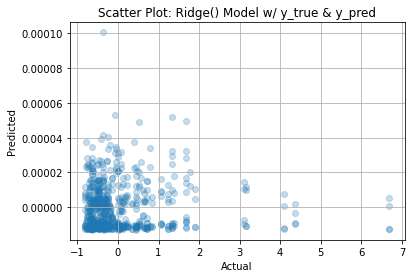


------------------ KernelRidge() Model
Best score in neg_mean_absolute_error: -0.63

------------------ KernelRidge() Model
Best score in neg_mean_squared_error: -1.00

------------------ KernelRidge() Model
Best score in r2: -0.15


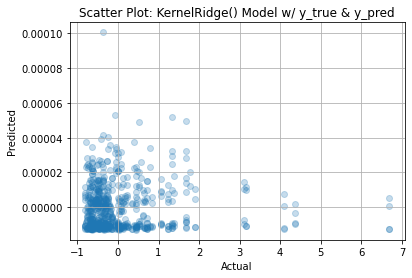


------------------ SVR() Model
Best score in neg_mean_absolute_error: -0.57

------------------ SVR() Model
Best score in neg_mean_squared_error: -1.11

------------------ SVR() Model
Best score in r2: -0.16


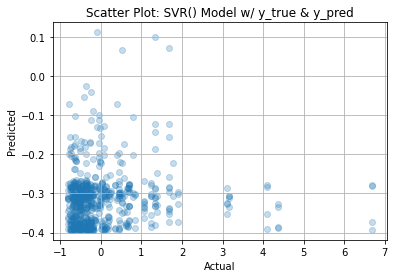


------------------ MLPRegressor() Model
Best score in neg_mean_absolute_error: -0.64

------------------ MLPRegressor() Model
Best score in neg_mean_squared_error: -1.02

------------------ MLPRegressor() Model
Best score in r2: -0.19


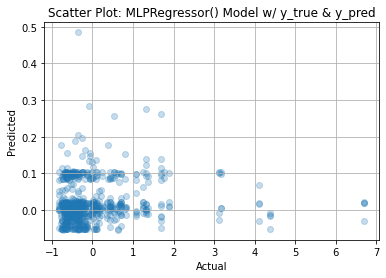


------------------ RandomForestRegressor() Model
Best score in neg_mean_absolute_error: -0.64

------------------ RandomForestRegressor() Model
Best score in neg_mean_squared_error: -1.03


In [ ]:
if __name__ == '__main__':
    models = ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab'] # ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab']
    rules = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'] # ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2']

    for model in models:
        for rule in rules:
            test = learning(model, rule, '/y_MVPA/y_MVPA.xlsx')
            test.gridSearchCV_eval()